In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 


In [2]:
df = pd.read_csv("AllMoviesDetailsCleaned.csv", encoding='utf-8-sig', sep=";", 
                 engine="python",parse_dates=["release_date"])

In [3]:
df.head(5)

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number
0,2,0,Drama|Crime,tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,0.823904,Villealfa Filmproduction Oy,Finland,...,69.0,suomi,Released,NaN,Ariel,7.1,40,2,1,2
1,3,0,Drama|Comedy,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",0.47445,Villealfa Filmproduction Oy,Finland,...,76.0,English,Released,NaN,Shadows in Paradise,7.0,32,1,1,3
2,5,4000000,Crime|Comedy,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,1.698,Miramax Films,United States of America,...,98.0,English,Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,6.5,485,2,1,1
3,6,0,Action|Thriller|Crime,tt0107286,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",1.32287,Universal Pictures,Japan,...,110.0,English,Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night,6.5,69,3,2,1
4,8,42000,Documentary,tt0825671,en,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,0.054716,inLoops,Austria,...,80.0,English,Released,A Megacities remix.,Life in Loops (A Megacities RMX),6.4,4,1,1,5


In [4]:
df.dtypes

id                                      int64
budget                                  int64
genres                                 object
imdb_id                                object
original_language                      object
original_title                         object
overview                               object
popularity                             object
production_companies                   object
production_countries                   object
release_date                   datetime64[ns]
revenue                                 int64
runtime                               float64
spoken_languages                       object
status                                 object
tagline                                object
title                                  object
vote_average                          float64
vote_count                              int64
production_companies_number             int64
production_countries_number             int64
spoken_languages_number           

In [5]:
df.isnull().sum()

id                                  0
budget                              0
genres                         121529
imdb_id                         78480
original_language                 203
original_title                      1
overview                        50984
popularity                          0
production_companies                0
production_countries                0
release_date                    24046
revenue                             0
runtime                         36792
spoken_languages                 4460
status                           1988
tagline                        276113
title                               1
vote_average                        0
vote_count                          0
production_companies_number         0
production_countries_number         0
spoken_languages_number             0
dtype: int64

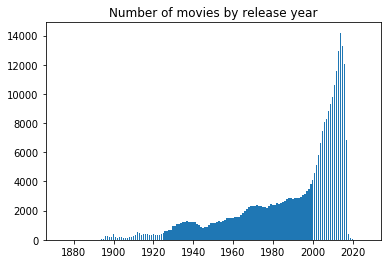

In [8]:
s = df["release_date"].map(lambda x:x.year)
nb_films_an = df["id"].groupby(pd.Index(s)).count()
plt.bar(nb_films_an.index,nb_films_an)
plt.title("Number of movies by release year")
plt.show()

In [9]:
# s = df["release_date"].map(lambda x:x.year)
# cumulative_vote = df["vote_count"].groupby(pd.Index(serie)).sum()
# plt.bar(cumulative_vote.index,cumul_vote)
# plt.title("Number of votes per year")
# plt.show()

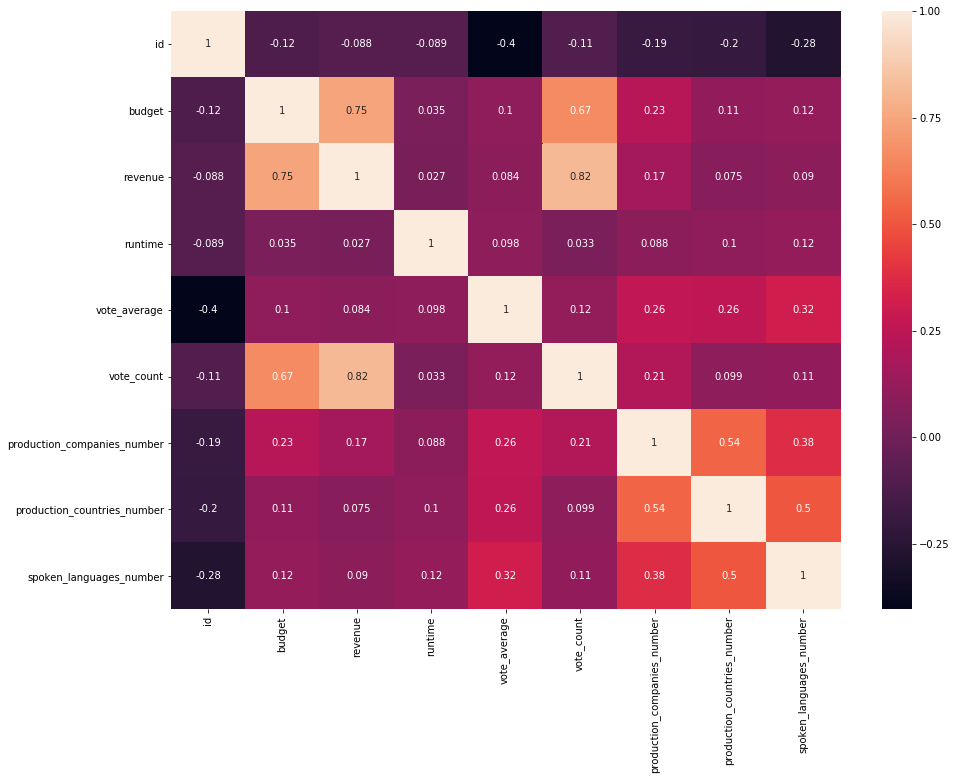

In [10]:
import seaborn as sns
 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,11))
corr = df.corr()
sns.heatmap(corr,annot=True, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [23]:
df.size

7238968

In [17]:
df1 = df.drop(columns=["imdb_id", "tagline", "spoken_languages_number", "production_countries_number", "production_companies_number"])

In [18]:
df1

,id,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,2,0,Drama|Crime,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,0.823904,Villealfa Filmproduction Oy,Finland,1988-10-21,0,69.0,suomi,Released,Ariel,7.1,40
1,3,0,Drama|Comedy,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",0.47445,Villealfa Filmproduction Oy,Finland,1986-10-16,0,76.0,English,Released,Shadows in Paradise,7.0,32
2,5,4000000,Crime|Comedy,en,Four Rooms,It's Ted the Bellhop's first night on the job....,1.698,Miramax Films,United States of America,1995-12-25,4300000,98.0,English,Released,Four Rooms,6.5,485
3,6,0,Action|Thriller|Crime,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",1.32287,Universal Pictures,Japan,1993-10-15,12136938,110.0,English,Released,Judgment Night,6.5,69
4,8,42000,Documentary,en,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,0.054716,inLoops,Austria,2006-01-01,0,80.0,English,Released,Life in Loops (A Megacities RMX),6.4,4
5,9,0,Drama,de,Sonntag im August,NaN,0.001647,none,Germany,2004-02-09,0,15.0,Deutsch,Released,Sunday in August,5.3,2
6,11,11000000,Adventure|Action|Science Fiction,en,Star Wars,Princess Leia is captured and held hostage by ...,10.492614,Lucasfilm,United States of America,1977-05-25,775398007,121.0,English,Released,Star Wars,8.0,6168
7,12,94000000,Animation|Family,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",9.915573,Pixar Animation Studios,United States of America,2003-05-30,940335536,100.0,English,Released,Finding Nemo,7.6,5531
8,13,55000000,Comedy|Drama|Romance,en,Forrest Gump,A man with a low IQ has accomplished great thi...,10.351236,Paramount Pictures,United States of America,1994-06-07,677945399,142.0,English,Released,Forrest Gump,8.2,7204
9,14,15000000,Drama,en,American Beauty,"Lester Burnham, a depressed suburban father in...",8.191009,DreamWorks SKG,United States of America,1999-09-15,356296601,122.0,English,Released,American Beauty,7.9,2994


In [22]:
df1.size

5593748

In [ ]:
df2 = df1.dropna()

In [20]:
df2

,id,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,2,0,Drama|Crime,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,0.823904,Villealfa Filmproduction Oy,Finland,1988-10-21,0,69.0,suomi,Released,Ariel,7.1,40
1,3,0,Drama|Comedy,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",0.47445,Villealfa Filmproduction Oy,Finland,1986-10-16,0,76.0,English,Released,Shadows in Paradise,7.0,32
2,5,4000000,Crime|Comedy,en,Four Rooms,It's Ted the Bellhop's first night on the job....,1.698,Miramax Films,United States of America,1995-12-25,4300000,98.0,English,Released,Four Rooms,6.5,485
3,6,0,Action|Thriller|Crime,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",1.32287,Universal Pictures,Japan,1993-10-15,12136938,110.0,English,Released,Judgment Night,6.5,69
4,8,42000,Documentary,en,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,0.054716,inLoops,Austria,2006-01-01,0,80.0,English,Released,Life in Loops (A Megacities RMX),6.4,4
6,11,11000000,Adventure|Action|Science Fiction,en,Star Wars,Princess Leia is captured and held hostage by ...,10.492614,Lucasfilm,United States of America,1977-05-25,775398007,121.0,English,Released,Star Wars,8.0,6168
7,12,94000000,Animation|Family,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",9.915573,Pixar Animation Studios,United States of America,2003-05-30,940335536,100.0,English,Released,Finding Nemo,7.6,5531
8,13,55000000,Comedy|Drama|Romance,en,Forrest Gump,A man with a low IQ has accomplished great thi...,10.351236,Paramount Pictures,United States of America,1994-06-07,677945399,142.0,English,Released,Forrest Gump,8.2,7204
9,14,15000000,Drama,en,American Beauty,"Lester Burnham, a depressed suburban father in...",8.191009,DreamWorks SKG,United States of America,1999-09-15,356296601,122.0,English,Released,American Beauty,7.9,2994
10,15,839727,Mystery|Drama,en,Citizen Kane,"Newspaper magnate, Charles Foster Kane is take...",3.82689,RKO Radio Pictures,United States of America,1941-04-30,23217674,119.0,English,Released,Citizen Kane,7.9,1110


In [21]:
df2.size

2868682

In [24]:
df2 = df2[~df2.index.duplicated(keep='last')]
df2.index.duplicated().any()

False

In [25]:
df2.size

2868682

In [26]:
df3=df2[df2.budget>0]

In [27]:
df3

,id,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
2,5,4000000,Crime|Comedy,en,Four Rooms,It's Ted the Bellhop's first night on the job....,1.698,Miramax Films,United States of America,1995-12-25,4300000,98.0,English,Released,Four Rooms,6.5,485
4,8,42000,Documentary,en,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,0.054716,inLoops,Austria,2006-01-01,0,80.0,English,Released,Life in Loops (A Megacities RMX),6.4,4
6,11,11000000,Adventure|Action|Science Fiction,en,Star Wars,Princess Leia is captured and held hostage by ...,10.492614,Lucasfilm,United States of America,1977-05-25,775398007,121.0,English,Released,Star Wars,8.0,6168
7,12,94000000,Animation|Family,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",9.915573,Pixar Animation Studios,United States of America,2003-05-30,940335536,100.0,English,Released,Finding Nemo,7.6,5531
8,13,55000000,Comedy|Drama|Romance,en,Forrest Gump,A man with a low IQ has accomplished great thi...,10.351236,Paramount Pictures,United States of America,1994-06-07,677945399,142.0,English,Released,Forrest Gump,8.2,7204
9,14,15000000,Drama,en,American Beauty,"Lester Burnham, a depressed suburban father in...",8.191009,DreamWorks SKG,United States of America,1999-09-15,356296601,122.0,English,Released,American Beauty,7.9,2994
10,15,839727,Mystery|Drama,en,Citizen Kane,"Newspaper magnate, Charles Foster Kane is take...",3.82689,RKO Radio Pictures,United States of America,1941-04-30,23217674,119.0,English,Released,Citizen Kane,7.9,1110
11,16,12800000,Drama|Crime|Music,en,Dancer in the Dark,"Selma, a Czech immigrant on the verge of blind...",2.106217,Fine Line Features,Argentina,2000-05-17,40031879,140.0,English,Released,Dancer in the Dark,7.6,348
13,18,90000000,Adventure|Fantasy|Action|Thriller|Science Fiction,en,The Fifth Element,"In 2257, a taxi driver is unintentionally give...",9.233786,Columbia Pictures,France,1997-07-05,263920180,126.0,English,Released,The Fifth Element,7.2,3629
14,19,92620000,Drama|Science Fiction,de,Metropolis,In a futuristic city sharply divided between t...,3.669986,Paramount Pictures,Germany,1927-10-01,650422,153.0,No Language,Released,Metropolis,8.0,614


In [28]:
df3.size

229602